<a href="https://colab.research.google.com/github/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/master/plantomatic_coursework_mediaprocessing_group_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**P L A N T O M A T I C** - COURSEWORK

---

*Kian Lütke, Carsten Montag, Johannes Maximilian Stürenburg*

This document outlines the documentation and progress journal of group I of the class _Media-Processing_. This work is divided in several chapters. Each section will be presented with executable code examples which will be - if run in the correct order - in the end illustrate the whole project together. 

It's very important to activate the following colab features<br> Click on the gear-icon in the upper right corner and under miscellaneous/sonstiges tick the two options:
- Corgi mode
- Kitty mode


# 1. Introduction



## 1.1. Motivation

This coursework is part of a multi-project class called _Mediaprocessing_ taught by Prof. Dr. techn. Susanne Boll-Westermann and Dr.-Ing. Larbi Abdenebaoui. During the introduction weeks several Projects were introduced to pick from. As one of the group members does grow herbs at home the obvious choice here is the project _How Is My Plant Doing_. To briefly explain the goal subject: An image of a plant should be analyzed to tell whether the plant needs watering or not.  



## 1.2. Case/Goal

The main goal of the project is to distinguish between two different plants and classify them to get an idea about their current state. 

A case was developed to fund the classwork’s structure upon:


<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/master/figures/1-concept.png?raw=1" height="300px" style="margin: 3em;">

**Fig 1** - Rough Concept

The idea outlines that some sort of robot will take care of a kitchen-garden. The robot should move from plant to plant taking pictures and processing the images. Afterwards the images will be analyzed and classified. The robot decides whether the plant needs to be watered or not. In the letter case a message will be send to the owner’s mobile device to inform about the plants state. The message could contain the image of the plant itself as well. As there is no access to a real robot which actually is able to move. This project will make use of a stationary Raspberry Pi computer with a camera attached to it. The Raspberry Pi will then take a set of pictures every hour and evaluate the plant-state directly.    



## 1.3. Methodology
This work is divided in two main sections: The feature analysis part and the machine learning part. The first part will cover how images were gathered and how these images will be processed in order to prepare them for the machine learning training. In the second part the actual learning of the machine learning algorithms.


# 2. Feature Analysis



## 2.1. Data Gathering

This section describes the process of acquiring images of the plants. The first approach was to use a mirrorless system-camera to take thousands of pictures.

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/dlsm_basilikum.jpg?raw=1" height="300px" style="margin: 3em;">

**Fig 2** - Picture taken with a DSLM Full Frame Camera [Sony a7 – 50mm/f5.6]

As seen in Figure 2 the results are astonishing. The downside comes with the amount of time needed to take all the needed images. Taking approx. 1200 images took around 3 hours. So, the idea came up to take short videos of the plant and extract single frames to process them as images. For example, a short clip of 30 seconds could generate 1800 images if every fame is used.

60 FPS Footage: 30 (seconds) * 60 (fps) = 1800

The drawback here is the blurriness of extracted frames. A solution will be discussed in the next section.

**Choosing the right plants**

At the beginning of the projects two different plants were chosen: Basil and German mint. During this project we decided – because of the difficulties to distinguish between this two plants  - to switch from mint to chives. We decided to create a diary and observe the plants in different states. More on that in the next chapter.




## 2.2. The Plant-Diary

Thie first report consists of two different plants. One chive and one basil. They were captured on video in different time-intervals. The expected outcome should be a good base to start the training of later models.

### Diary One

> Date | State of Chive | Sate of Basil | Video Chive | Video Basil | Notes | Time passed (h) since recovery 
> --- | --- | --- | --- | --- | --- | ---
> 09.12.20 12:30 | New | Needs watering | ------------------------------------------------------ | ------------------------------------------------------ | Last watering | n/a
> 09.12.20 17:00 | No change visible | Fully recovered | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/schnittlauch1.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/basilikum1.gif?raw=1" height="100"> |  | 0
> 10.12.20 12:10 | No change visible | No change visible | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/schnittlauch2.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/basilikum2.gif?raw=1" height="100"> |  | 19
> 10.12.20 19:50 | Visible hanging of the leaves | Pot is very light, will need water soon | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/schnittlauch3.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/basilikum3.gif?raw=1" height="100"> |  | 27
> 11.12.20 11:50 | Even more hanging | Leaves also start hanging; pot is very light; needs water | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/schnittlauch4.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/basilikum4.gif?raw=1" height="100"> |  | 43
> 12.12.20 09:10 | Still green; growing fast | End of experiment; final state is reached | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/schnittlauch5.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/basilikum5.gif?raw=1" height="100"> | Basil gets watered | 64
> 13.12.20 14:30 | Still hanging | Fully recovered again | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/schnittlauch6.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/basilikum6.gif?raw=1" height="100"> | Chive gets watered | 93
> 14.12.20 12:30 | Still the same development | aborted | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/schnittlauch7.gif?raw=1" height="100">  | n/a |  | 116
> 16.12.20 08:30 | Still the same development | aborted | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/schnittlauch8.gif?raw=1" height="100">  | n/a | Experiment aborted | 159

The table shows different development between the two plants. The chive grew a lot and hat brownish stalks. The basil on the other hand indicated the lack of water with hanging leaves. After reaching the final-hanging state the basil was watered in recovered quickly to its initial state. Contrary the chive did not indicate any lack of water. It just grew and developed more brown stalks. After watering the chive did not respond at all. 

It might be important to say that the chive might have been in a bad, overwatered condition straight out of the supermatket where it wad bought. The soil was quiet wet and mulded already. Also the soil seemed very muddy. 

To conlude, the chive might have shown better results when sowing manually in a better conditionated soil.

### Diary Two

The results in the previous diary led to another experiment with a different plant. Instead of using the chive for the experiment, a parsley was introduced.

> Date | State of Parsley | Sate of Basil | Video Parsley | Video Basil | Notes | Time passed (h) since recovery 
> --- | --- | --- | --- | --- | --- | ---
> | | | ------------------------------------------------------ | ------------------------------------------------------ | | 
> 16.01.20 10:30 | Newly bought plant | Newly bought plant | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/petersilie1.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/basilikum1.gif?raw=1" height="100"> |  | 0
> 17.01.20 10:30 | No change visible | No change visible | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/petersilie2.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/basilikum2.gif?raw=1" height="100"> |  | 24
> 17.01.20 17:30 | Leaves at the bottom start drying | Form a bit changed | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/petersilie3.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/basilikum3.gif?raw=1" height="100"> |  | 31
> 18.01.20 10:30 | Slowly going to hang | Starts leaning sideways | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/petersilie4.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/basilikum4.gif?raw=1" height="100"> |  | 48
> 18.01.20 21:30 | Growed a bit; stalks falling into different directions | Even more dried bottom leaves | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/petersilie5.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/basilikum5.gif?raw=1" height="100"> |  | 59
> 19.01.20 14:30 | Same development | Por very light, needs water very soon | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/petersilie6.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/basilikum6.gif?raw=1" height="100"> |  | 76
> 20.01.20 12:30 | Endstate: Still green no differentiatable signs of dryness | Dry bottom leaves. Hanging just a bit | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/petersilie7.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/basilikum7.gif?raw=1" height="100">  |  | 98

Its very noticable how different the basil is developing this time. Instead if having its leaves hang it starts drying on the bottom where the leaves are small. The parsley on the other hand did just grow and started falling into different directions. After watering it did not show any differences just like the chives.

### Findings
Two plants of the same kinds can indeed develop completely different. This could be due to the fact that the environment is change in example temperature, moisture and so on. Also its not known under which circumstances the plants grew as they were bought from the supermarked. Each plant bought did behave different and showed different signs of dryness.

For the later machine learning model, all basil footage will be combinded into theree different stages. It will be further explained in the corrisponding chapter.


## 2.3. Pre-Processing

To help the later machine learning processes, an image-processing pipeline was introduced. First and foremost the captured video material must be converted to single frames. Whilst having this frames already openend a few operations to improve learning can be made. Also very blurry images should be sorted out.

The following diagramm is illustrating the idea behind the pipe. 

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/figures/ppipe.svg?raw=1" height="380px" style="margin: 3em;">

**Fig 2** - Pre Processing Pipe

The figure will not be explained in detail instead the code will be executable interactively in the following. Please note that the code-snippets must be executed in the order they appear.



In [ ]:
%%bash
# Download the Video from Server

PLANTS=('basilikum' 'petersilie')
STATES=('1' '2')
SERVER_URL='https://video.natgo.dev/'

# Create plants folder
mkdir plants
cd plants

for plant in "${PLANTS[@]}";do
  for state in "${STATES[@]}";do
    wget "$SERVER_URL$plant$state.mp4"
    mkdir $plant$state
  done
done


The snippet above will download the videos taken of the plants in two different states.
 1. Fresh
 2. Dry

Different approaches were tried; like downloading three classes/states of each plants. But the results (which can be found in later chapters) were not that astonishing.  

In [ ]:
# imports
import cv2 as cv2
import numpy as np

# CONSTANTS
BLURRYNESS_THRESHOLD = 50 #@param {type: 'slider', min: 0, max: 150}
HSV_LIGHT_GREEN = (30,100, 80)
HSV_DARK_GREEN = (105,255,255)
PLANT_DIR = 'plants'

# FUNCTIONS #
def variance_of_laplacian(image):
	return cv2.Laplacian(image, cv2.CV_64F).var()
 
def resize_img_to_percent(img, percent):
  scale_percent = percent # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  # resize image
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  return resized

# Maskingfunction
def create_green_mask(img):
    hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_image, HSV_LIGHT_GREEN, HSV_DARK_GREEN)
    return cv2.bitwise_and(img, img, mask=mask)

def process_video(video, plant, state):
  index = 0
  while(video.isOpened()):
    ret, frame = video.read()
    if not ret:
      break
    # Every n Frame for testing
    if plant == 'petersilie':
      every_n_frame = 3
    elif plant == 'basilikum':
      every_n_frame = 5
    if index % every_n_frame == 0:
      # Check for blurrynes
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      focus_measure = variance_of_laplacian(gray)
      if focus_measure > BLURRYNESS_THRESHOLD:
        # resize image
        frame = resize_img_to_percent(frame, 50)
        # mask image
        frame = create_green_mask(frame)
        # canny the image
        frame = cv2.Canny(frame,100,200)
        cv2.imwrite(f'./{PLANT_DIR}/{plant}{state}/{plant}{index}.jpg', frame)
      else:
        print(f'{plant} # {state} Frame #{index}: Too blurry! Focus Measure: {focus_measure}')
    index += 1



This listing is showing the initial definition of functions which will be used to mask, resize or measure the focus of images. The latter one was brought up by a study from S. Pertuz, D. Puig and Miguel Ángel García in 2013 where 36 different approaches of mesuring focus were examined. The decision to use the Laplacian Variance was take because the measurement method performed best over all [1]. 
With this method, it is possible to sort out blurry images, because Videos are not always perfectly focused.

In this projekt two different methods will be tried to optimize the images for the later machine learning.

1. Masking the image
2. Detecting edges on the masked image

It will be investigated if these methods lead to better machine learning results. 

For masking the the image a coversion of the image into the HSV (Hue, Saturation, Value) takes place. The Variables `HSV_LIGHT_GREEN = (30,100, 80)
HSV_DARK_GREEN = (105,255,255)` are defining the range in which the image should be masked. The result looks like the following image [2]:

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/basilikum_masked.jpg?raw=1" width=400>
  
<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/petersilie_masked.jpg?raw=1" width=400>


**Fig 3** - Green-masked images

To further simplyfy the images another layer of simplification is made. Just using the edges found by the canny algorithm which is performing well on the masked images like seen in this picture [3]:

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/basilikum_cannied.jpg?raw=1" width=400>
<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/petersilie_cannied.jpg?raw=1" width=400>

**Fig 4** - Cannied images


The following snippet will load the videos and passes them into the processing function to capture single frames and use the functions to modify the images. Not every frame is going to be used as the footage is shot in 60 frames per second and many frames would be nearly exactly the same.



[1] https://www.semanticscholar.org/paper/Analysis-of-focus-measure-operators-for-Pertuz-Puig/8c675bf5b542b98bf81dcf70bd869ab52ab8aae9?p2df<br>
[2] https://www.pyimagesearch.com/2014/08/04/opencv-python-color-detection/<br>
[3] https://www.sciencedirect.com/science/article/abs/pii/S0031320300000236<br>

In [ ]:
# Iterate over videos and process them
plants = ['basilikum', 'petersilie']
states = [1, 2]

for plant in plants:
  for state in states:
    video = cv2.VideoCapture(f'./{PLANT_DIR}/{plant}{state}.mp4')
    process_video(video, plant, state)


## 2.4. The Robot aka the Raspberry Pi

To mimic a robot a Raspbarry Pi coupled with the pi camera module was used in this project. 

The idea is as mentioned that the raspberry pi captures an image occasionally and predicts its state with the use of the machine learning models which will be obtained later. 

This is the first prototype of the raspberry-robot:

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/pi_initial.jpg?raw=1" width=400>
<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/pi_initial_2.jpg?raw=1" width=400>

**Fig 5** The Raspberry Pi Robot

The first experiments with the pi camera module were made with the Python-library _picamera_. [4]

The following snippet illustrates how pictures are taken and processed right on the Raspberry Pi (this is not executable in this notebook):

```python
#!/usr/bin/python3.7

from picamera import PiCamera
from time import sleep
from fractions import Fraction
import numpy as np
import cv2
import bot_api as bot

# Globals
image_path = '/home/pi/mediaprocessing/images/plant.jpg'
image_masked_path = '/home/pi/mediaprocessing/images/plant_masked.jpg'
image_canny_path = '/home/pi/mediaprocessing/images/plant_cannied.jpg'
LG = 19
DG = 56 
HSV_LIGHT_GREEN = (LG,100, 100) 
HSV_DARK_GREEN = (DG,255,200)

# functions
def resize_img_to_percent(img, percent):
  scale_percent = percent # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  # resize image
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  return resized

# Maskingfunction
def create_green_mask(img):
    hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_image, HSV_LIGHT_GREEN, HSV_DARK_GREEN)
    return cv2.bitwise_and(img, img, mask=mask)

def capture_image():
    with PiCamera() as camera:
        # camera set-up
        camera.resolution = (1280, 720)
        camera.rotation = 90
        camera.framerate = Fraction(1, 2)
        camera.shutter_speed = 1000000
        camera.exposure_mode = 'off'
        camera.iso = 100
        sleep(5)
        camera.capture(image_path, quality=95)

capture_image()
img = cv2.imread(image_path)
img = resize_img_to_percent(img, 50)
img = create_green_mask(img)
cv2.imwrite(image_masked_path, img)
img = cv2.Canny(img,100,200)
cv2.imwrite(image_canny_path, img)
```
The image-manipulation functoins mainly stayed the same except of different HSV-values. This is necessary because the images taken by the pi camera are a bit off in colors. Also noticable is the fact that the cameras can be fully adjusted in terms of shutter-speed, exposure-time, resulotion or iso.
So it was possible to produce medium quality pictures in difficult light situations (not direct daylight).

The captured image is afterwards resized, masked and cannied. All images are saved locally to compare different machine learning models in later chapters.

Here are example pictures:

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/bad_basilikum.jpg?raw=1" width=300>
<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/bad_petersilie.jpg?raw=1" width=300>
<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/bad_petersilie_masked.jpg?raw=1" width=300>

**Fig 6** - Raspberry Pi example pictures

As seen in the example the quality of the images is really bad, the module might be defective or not cabable of shooting at least sharp images. As a result the masking fails as seen in Figure 6 (Even with adjusted HSV-values).

So after a lot of trail and error with the pi camera module and also a logitech webcam a new approach must be taken into consideration.

The next idea is to use an IP-camera for taking pictures and process the image on the raspberry pi. The solution is an app called _iPCamera - High-End NetworkCa‪m‬_ which works for iPhone and iPad. [5]

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/ipcam_screenshot.png?raw=1" width=500>

**Fig 7** - iPCamera interface in webbrowser

The stream transferred over the network can be used with opencv to capture frames and process them.

The former function `capture_image()` is now being completely being replaced by the following snipped:

```python
[...]

IP_CAM_URL = 'http://192.168.50.194/live'

def capture_image():
  ip_video = cv2.VideoCapture(IP_CAM_URL)
  ret, frame = ip_video.read()
  cv2.imwrite(image_path, frame)
  ip_video.release()

[...]

```

With that method only one frame is captured and the quality of the images is excellent:

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/basilikum_ipcam.jpg?raw=1" width=400>
<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/basilikum_ipcam_masked.jpg?raw=1" width=400>

**Fig 8** - Images taken by the IP-camera

This images are taken by the same camera as the training material so good results are expected.

[4] https://picamera.readthedocs.io/en/release-1.13/index.html<br>
[5] https://apps.apple.com/de/app/ipcamera-high-end-networkcam/id570912928<br>

## 2.5. Telegram Bot


To notify the plant owner this project uses the telegram-bot API. It is easy to use and no phone-verification, business-profile or similar is necessary to implement a bot like it would be needed with Whatsapp. [5][6]

So after the initial bot-creation, which is easily done by messeging [_botfather_](https://core.telegram.org/bots#6-botfather) on telegram, a bot-token is generated. This token can be used to send requests to the telegram API. 

```python
bot_token = 'YOUR-BOT-TOKEN'
url = f'https://api.telegram.org/bot{bot_token}/getUpdates'
response = requests.get(url)
print(response.json())
```

This snippet will be used to get information about a users messeging the bot. Its needed because the API needs a user-id for sending messeges or images. 

Example ouput would look like this:

```json
{
    "ok": true,
    "result": [
        {
            "message": {
                "chat": {
                    "first_name": "Kian",
                    "id": 388305285,
                    "type": "private"
                },
                "date": 1613207709,
                "from": {
                    "first_name": "Kian",
                    "id": 388305285,
                    "is_bot": false,
                    "language_code": "en"
                },
                "message_id": 242,
                "text": "Hey Bot!"
            },
            "update_id": 119759391
        }
    ]
}
```

The obtained user-id can be further used to send updates with plant state information. 

For this coursework its not necessary to implement the full-blown python telegram-api wrapper [7]. As the API is reachable over the HTTP-Protocol a simple module to send images and text would look like this:

```python
import requests

bot_token = 'YOUR-BOT-TOKEN'
chat_id = '388305285' # Kians
url = f'https://api.telegram.org/bot{bot_token}'

def send_text(bot_message):
    response = requests.get(f'{url}/sendMessage?chat_id={chat_id}&parse_mode=Markdown&text={bot_message}')
    return response.json()


def send_image(imageFile):
    response = requests.post(f'{url}/sendPhoto', data={'chat_id': chat_id}, files={'photo': open(imageFile, 'rb')})
    return response.json()

```

This listing can be imported into any other python-script and used to send messeges to the _chat_id_ shown in the definition scope.


[5] https://core.telegram.org/bots<br>
[6] https://www.facebook.com/business/m/whatsapp/business-api<br>
[7] https://github.com/python-telegram-bot/python-telegram-bot<br>

## 2.6 Testing the Setup

Now bringing together all the above steps some testing is neccessary to verify that everything works as intended.

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/ipcam_setup.jpg?raw=1" width=400>

**Fig 9** - IP Camera Setup

For the test the image-capture snippet (in Chapter 2.4) will be execudet with the folling lines appended:

```python
bot.send_text('Here is an image for you:')
bot.send_image(image_path)
bot.send_image(image_masked_path)
bot.send_image(image_canny_path)
```

The surprinsing good ouput by the bot looks like this:

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/bot_screenshot.png?raw=1" width=400>

**Fig 10** - Bot sending test images

The established setup looks promising and delivers high-quality images. Also the Bot can send text and images to the owner of the plants. 

In the next part will cover the development of the machine-learning model.

# 3. Machine Learning

Machine Learning according to Zhang (1999) is a model that uses experience to generate an algorithm that performs an automated mapping from inputs to outputs. The type of input can differ, in the case of this project the input is a picture and the output is a classification.
Machine learnings significance can be shown by comparing it to traditional programming. In the example of an e-mail spamfilter, traditional programming would create a blacklist of senders that are statically classified as spam. In machine learning a model would get a set of e-mails that are classified as spam and not spam, the model itself creates a mapping method that determines if new e-mails are spam.
The machine learning method that was created in this project will be referenced as the model, a model is defined by a set of hyperparameters and architectures.

When comparing the Zhangs definition of machine learning, the experience used is a set of pictures combined with the information what the picture contains. The mapping that needs to be done in the future is determining the object in a picture that has not been used for training. The model thus needs to classify an object, this is also known as a classification problem.
The now described method is calles supervised learning, the supervision here is giving the model said experience.
<br />














## 3.1 Approach

The goal of this project is to differentiate between two different plants and then determining the state of the plant, the state in this case is the hydration. 
We use the supervised learning approach for image recognition in this project, we chose this approach because of the relative simplicity and the adecuacy of the implementation. Other methods, like unsupervised learning where clustering techniques would be used, were examined and the final decision was made to use supervised training.

To implement this learning method the model needs a dataset that includes information about the image in question, this information is supplied in the form of labelling.
All programming in this project was done with Python and Keras, which is the de facto standard for machine learning implementation method.

</br >

## 3.1 Labelling


For the prototype of the convolutional neural network model a basic labelling method was developed. The final classes of images that will need to be classified by the neural network are shown below.

**1:** Basil in need of watering

**2:** Basil in good condition

**3:** Parsley in need of watering

**4:** Parsley in good condition
<br />

These pictures were seperated in different paths and labelled automatically using python. These labels are the additions of "Basilikum" and "Parsley" to the pictures file name. Another more sophisticated labelling process was developed which is described in Chapter **X.X**.
<br />

These pictures were labelled according to the object or respectively the class they show, then are used for the training and validation of the neural network. If we again look at Zhangs definition of machine learning, this database is the experience the machine learning model will use to create a function to map the inputs. If the training is successful, the model would then get a picture of a plant it has not seen before, and then determine the state of the object recognized in this picture.
<br />



## 3.2 Learning




## 3.2.1 Loss Functions

A neural network needs a metric to know how precise the predictions are, this metric is a loss or cost function and is used to change the weights and parameters of a neural network.

The binary crossentropy is used in the prototype of the convolutional neural network as the loss function. It is composed of a sigmoid activation and a cross-entropy loss and can only compute a loss with a maximum class number of two, as the name suggests a binary classification. Since the prototype of the model only needs to differentiate between two classes this function was used. It is described by the following formula.

<br />

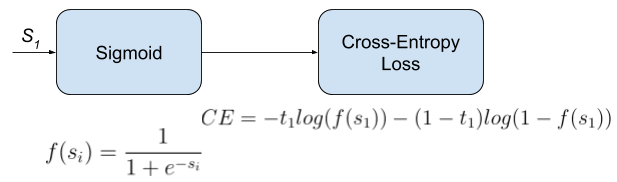

Quelle: https://gombru.github.io/2018/05/23/cross_entropy_loss/




This loss function can only be calculated when using supervised learning. The two relevant values in the function is the predicted class value and the actual class value, which correspond to a value of 0 and 1 in case of the binary classes. The reason the labelling of pictures is neccessary is the calculation of the loss function, this way the network can determine the precision of the network by calculation the error of all inputs.
The result of this function is the deciding factor in changing the weights and parameters of the network which is done automatically by the model. 

</br >

**Batch Size**

If for example a batch size of ten is chosen for training, the loss function for these ten pictures will be calculated. The adaption of the weights neccessary to minimize the loss function will be calculated based on the loss function and the average adaption of these weights will be applied at the learning rate. This process will run iteratively to minimize the cost function of all input pictures until a satisfying result is met.

</br >

**Learning Rate**

The process of changing the weights based on the cost function is called backpropagation which uses gradient descent methods.
The goal of this process is to determine the global minimum of the loss function, this means that the error of all input pictures would be minimal. In the picture below is a two-dimensional costfunction as an example, a cost function in a neural network typically is highly multidimensional and is dictated by the number of adaptable parameters in a neural network and respectively the size of the network. 
The learning rate determines how fast the changes in the parameters will be applied, some methods use a variable learning rate to counteract the below listed problems.

**1:** The learning rate is too big
This will result in the network not being able to find the global minimum because the adaption steps are too big

**2:** The learning rate is too small
This will result in the network not being able to leave a local minimum. 

</br >

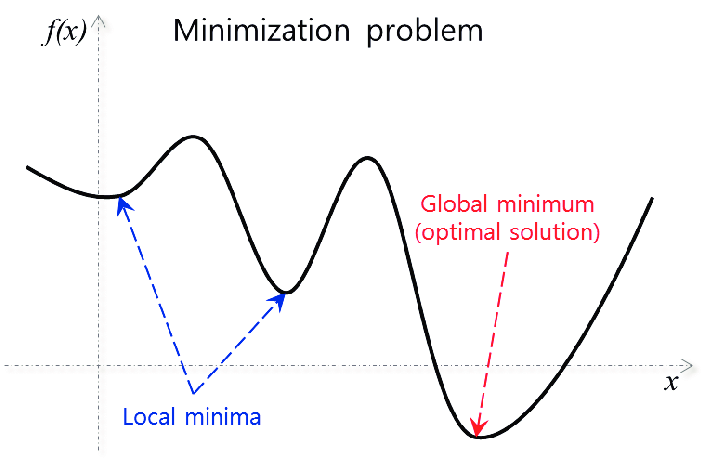




Quelle: https://www.researchgate.net/figure/Example-of-local-and-global-solutions-in-an-optimization-problem_fig3_322270023

</br >



## 3.3 Problems

## 3.3.1 Performance 

When first implementing the convolutional neural network, we used the original size of the image which was taken with a high-quality camera which resulted in erros concerning the temporary storage limitations of the hardware. Due to the multidimensional structure of the input data, a doubling in size of the image means an increase of the input data by the factor 4. Thus the training is only possible with a very small batch size and even then takes a considerable amount of time for training, the obvious solution was a reduction in size of the input pictures, which greatly increased the performance. Analogous to the increase of the image size, a decrease of the image size by the factor of 2 means an input size reduction by the factor 4. The question to be answered  is how the final accuracy of the convolutional neural network is if the image size is greatly reduced. We decreased the size of the image so far that the training of the model is performed in an acceptable timeframe.
<br />

## 3.3.2 Hardware

Without using the generator described in Chapter **X.X**, even a small batch size will cause an error in the programming environment because the amount of temporary storage used is greater than the amount available, which already was sixteen gigabytes of RAM. This happens because all input pictures of the batch will be loaded into the ram for training, with a large amount of training data this limitation is reached very quickly.

The training speed could be enhanced by using hardware that is specialized on using tensorflow, respectively newer Nvidia hardware. This problem was solved by using the Google Collab platform which utilizes specialized hardware on a server. 
<br />


## 3.3.3 Generalization

The goal of this convolutional neural network is the the image classification of a plant and its state. A major problem is the needed generalization of the model, which is the ability to transfer aquired knowledge by the training to input data that has not been used for training, this presupposed a very large variety in the learning dataset. Since we used our own plants the variety is comparatively small, this means that the neural network could  memorize the plants that we used for training instead of learning its defining features. In this case the model could only recognize the used plants reliably but not new data for predictions.
<br />

##3.4 Types of Layers in a CNN

A convolutional neural network for image recognition can be composed of multiple types of layers. Typical layers are the Conv2d Layer, the MaxPooling Layer, a Dropout Layer, a Flatten Layer and a Dense Layer, which will shortly described in this chapter.
<br />


**Conv2D Layer**

<img src="https://miro.medium.com/max/1320/1*LT0l-KXw5FXIkcGVl-KXlQ.gif" height="200x" >
Quelle: https://towardsdatascience.com/conv2d-to-finally-understand-what-happens-in-the-forward-pass-1bbaafb0b148

The Input of a Conv2D Layer is three-dimensional, this naming scheme can be confusing, but the two-dimensionality of this layer is based on the filters movement. In the example of this picture the filter has the size of three by three and a stride of one. The filter can also be called a kernel, this size defines the convolution size, a size three by three kernel convolutes nine pixels into one. The stride is the size of steps that are done after each convolution, in this animation the stride is one.
The features of nine single pixels would be condensed into a single pixel, this produces an abstraction of a certain part of the image which could be an edge of a number or the edge of a plants part in the case of this project. Since the filter usually has overlapping due to the striding typically being lower than the filters size, the input is not condensed linearly. The output of this layer is an set of pictures which are smaller than the input picture, this is used to get multipe abstracted sets of features of a single input picture. This output is also called a feature map. Generally speaking these subsets can represent features which could indicate the presence or abscence of a certain object. The number of features in these maps typically are lower after each respective layer, the first feature map in the case of number recognition could represent the upper half of an eight which is a circle. Further feature maps usually are subfeatures like parts of the circle mentioned above.


<br />


**MaxPooling Layer**

<img src="https://developers.google.com/machine-learning/practica/image-classification/images/maxpool_animation.gif" height="200x" >
Quelle: https://developers.google.com/machine-learning/practica/image-classification/convolutional-neural-networks

The MaxPooling Layer depending on the pooling size takes an image array as the input, typically this input comes from the Conv2D layer. With a pooling size of two by two the highes value of these pixels is saved and the rest discarded, this is essentially a simple downscaling of a picture which keeps the essential part of the input information. If a single input consists of three black pixels and one white pixel which represents a border of an object, only this information is saved because it is assumed that lower valued pixels are not essential to the pictures information. This pixel value could also represent a color which may be relevant in the classification. A MaxPooling size of two by two would reduce the input by the factor 4. The goal of this layer is the reduction of the input size with the minimal loss of valuable information, which will increase performance.

<br />


**Dropout Layer**

This layers function function is to stop overfitting in the neural network, which would mean the network is not generalizing well and learns the inputs used for training. This is especially prevalent in small datasets.
Parts of the input are then forgotten at a random rate which according to Srivastava et. Al. prevents units from co-adapting too much, which improved performance in multiple supervised learning tasks.

Quelle: https://jmlr.org/papers/v15/srivastava14a.html

<br />

**Flattening**

<img src="https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png
" height="200x">
Quelle: https://www.superdatascience.com/blogs/convolutional-neural-networks-cnn-step-3-flattening

The Flattening Layer is a preperation for the further input of the fully connected layer, this fully connected layer can be described as a traditional non-convolutional neural network. This input needs to be a single array due to the nature of the used network, the flattening takes all multidimensional feature subsets and produces one  one-dimensional array. This step does not condense information and is solely a data transformation.

<br />

**Fully Connected Layer**

<img src="https://miro.medium.com/max/1400/1*IWUxuBpqn2VuV-7Ubr01ng.png
" height="200x">
Quelle: https://towardsdatascience.com/the-most-intuitive-and-easiest-guide-for-convolutional-neural-network-3607be47480


This layer takes the array of values from the flattening step and is composed of multiple layers of classical neurons. The Conv2D, MaxPooling and flattening steps before this layer can be seen as preparations for the majority of calculations the model needs to do in order for a prediction. As described in the learning chapter these weights and biases of the neurons in this layer are adapted to improve the models prediction capabilities.


<br />

**Dense Layer**

The Dense Layer is a condensation of a previous layer, because of this reduction of the neuron count this is called the Dense Layer. If the goal of a CNN is the determination if a the object in a picture ist a dog or a cat, the last layer should be composed of two neurons in a dense layer. One of these neurons is symbolically a cat and the other a dog, if the final value of the neuron classifying a cat is 0.84, this would mean that the object in said picture is a dog with 84% certainty. The number of dense neurons in the last layer is typically the number of possible classes that should be predicted by a convolutional neural network.
<br />

## 3.5 Custom prototype model

For the first approach a custom model was created using a set of Conv2D and MaxPooling layers.
<br />

```python
def get_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(IMG_HEIGHT,IMG_WIDTH,COLOR)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(NUMBER_OF_CLASSES, activation="softmax"))
    model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["acc"])
    return model
```


The models layers and hyperparameters were added in this function and the ReLU activation function was used. This function does not change positive values and negative values are mapped to zero, as seen in the figure below.


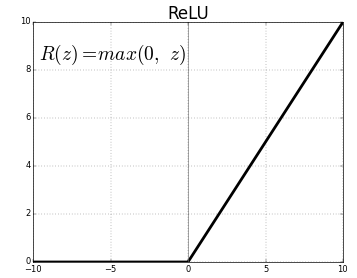

Quelle: https://medium.com/@kanchansarkar/relu-not-a-differentiable-function-why-used-in-gradient-based-optimization-7fef3a4cecec

**Visualization of Layer Outputs**


The following figure is the input of the CNN with the shape of 960x540x3. 960 being the width, 540 the height and 3 the color channels. The brightness of the pictures features indicates the activation function of each pixel, the scale of this activation value is represented in the bar on the right of the figure.
<br />






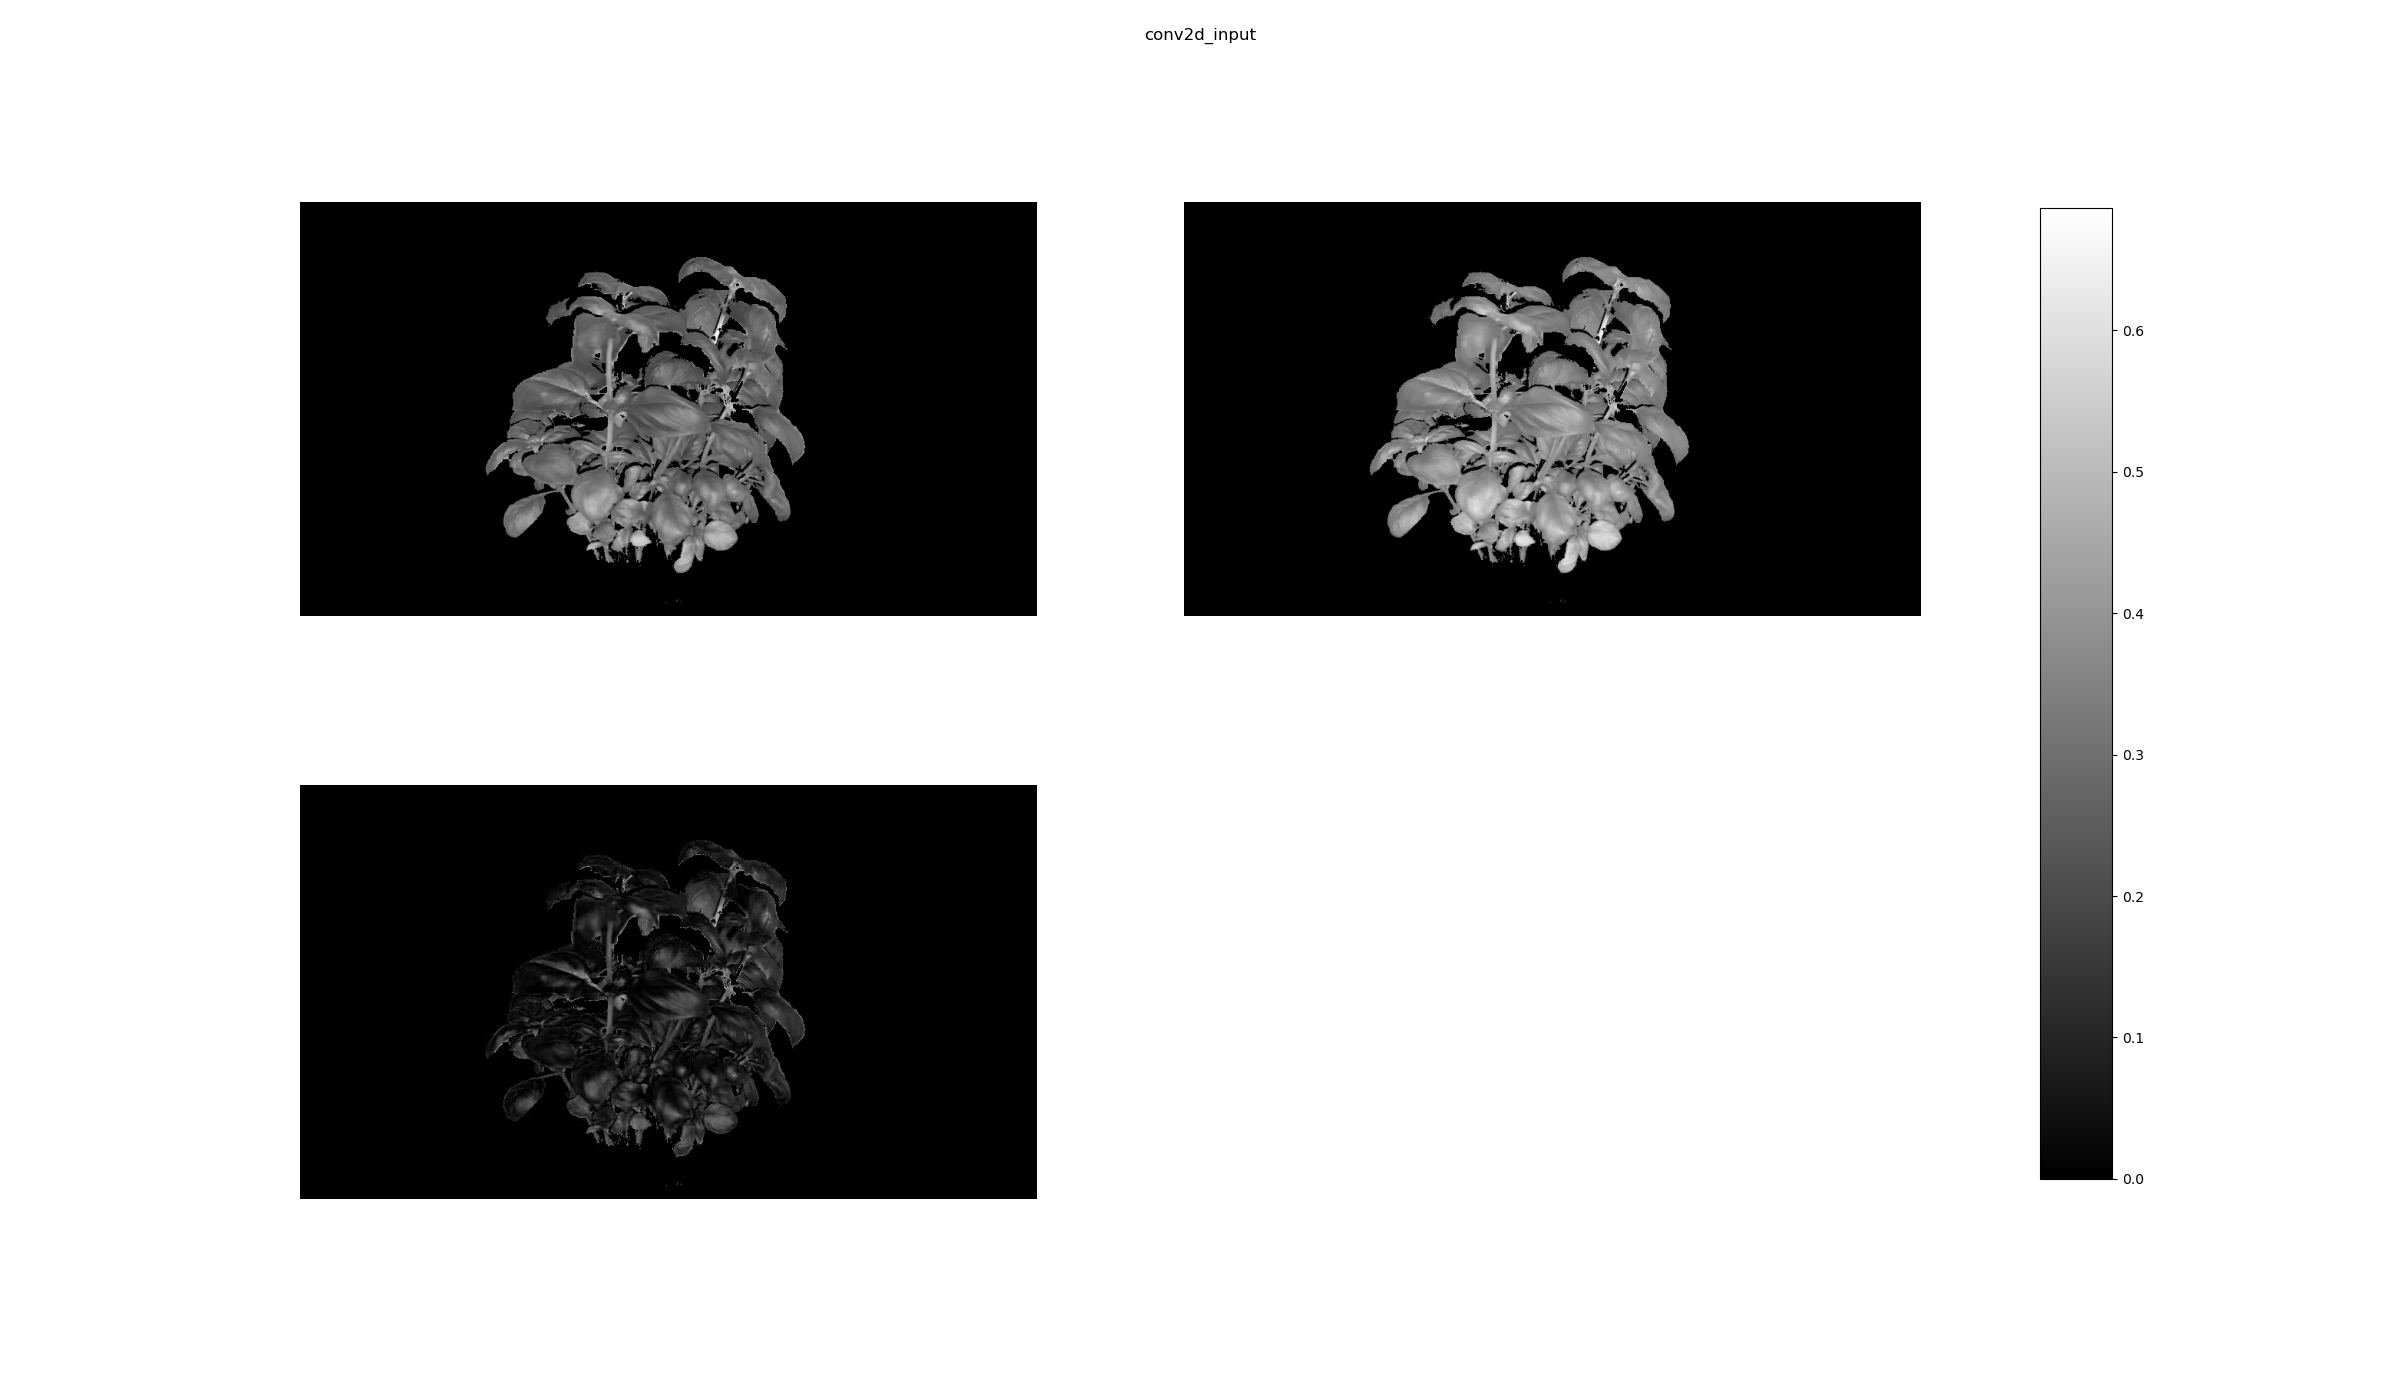


The following picture is the result of multiple MaxPooling and Conv2D layers. These pictures are feature subsets, visually the most prominent features are the edges of the plants leaves.

<br />

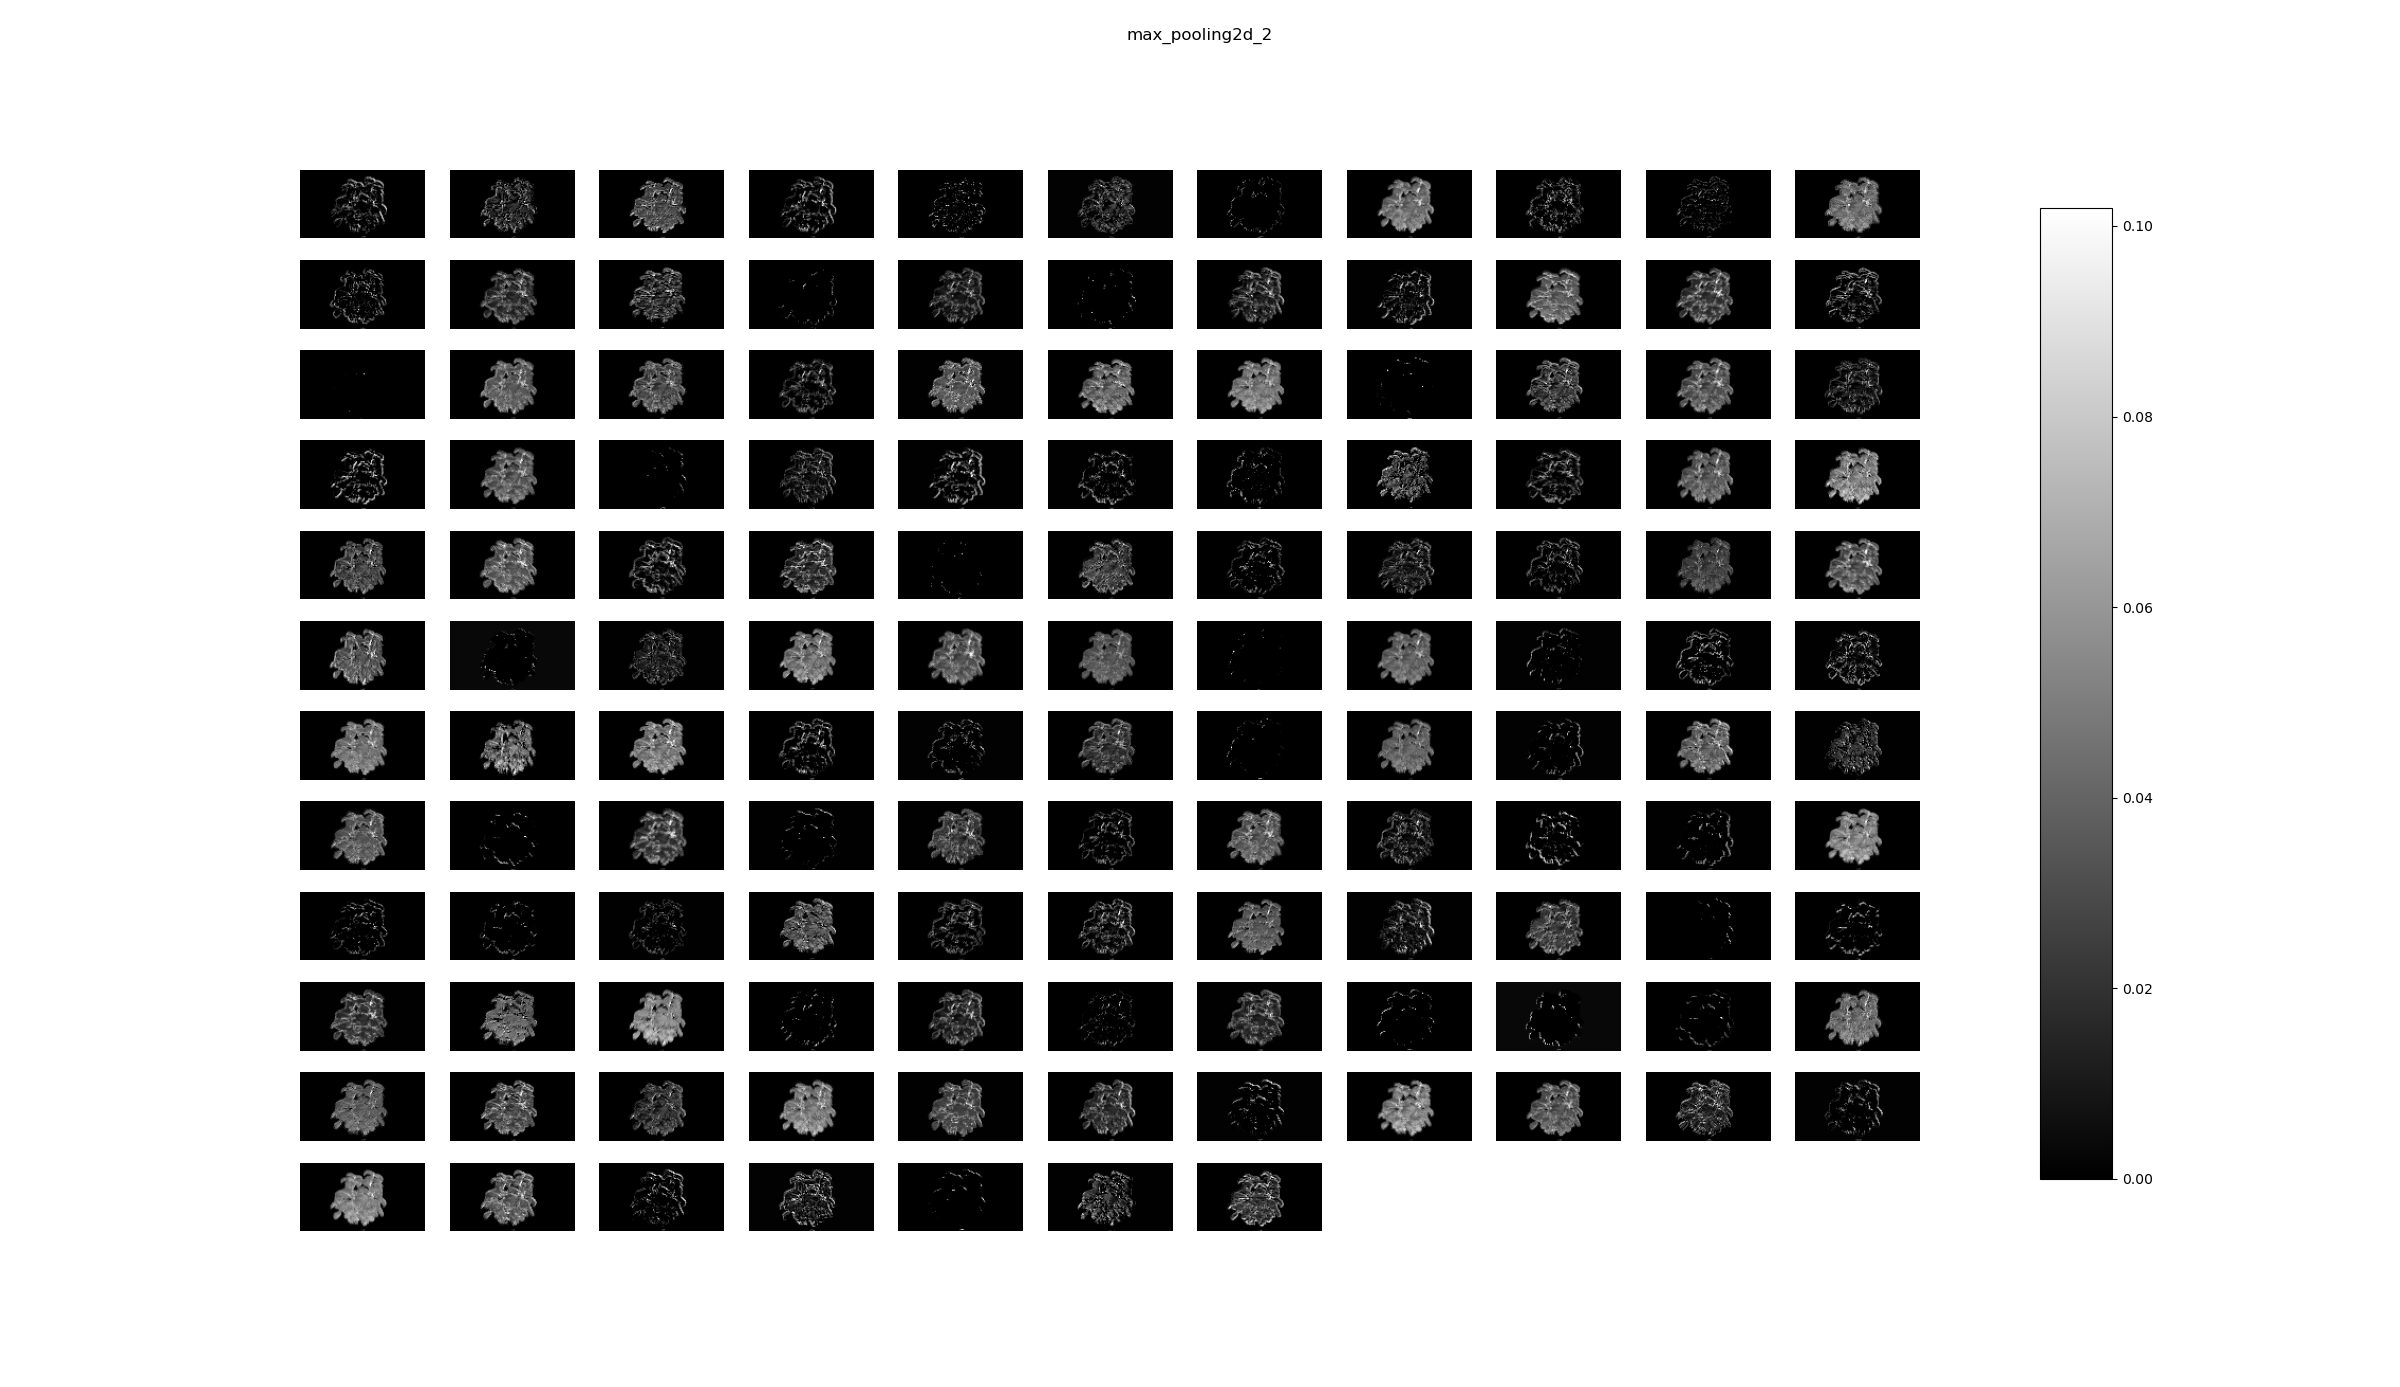

These subsets are then flattened into a single array which is then used in the fully connected layer. The following picture is the single array with the corresponding pixels which function as the input for the fully connected layer. This array is scaled and composed of numbers between zero and one which enable a neural network to process them.

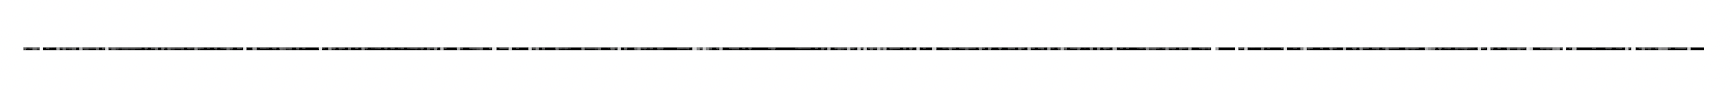

Below is the summary of the custom model, the layers and parameters of each layers are listed here. A total of 118,076,098 parameters can be trained to minimize the cost function. This translates to a global cost function with more than a hundred million dimensions, this resulted in  high time and hardware demands for training and paired with non-optimal results led to the rejection of the custom model in favor of the EfficientNet architecture.



```Python
Layer (type)                 Output Shape              Param #
=================================================================
conv2d (Conv2D)              (None, 538, 958, 32)      896
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 269, 479, 32)      0
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 267, 477, 64)      18496
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 133, 238, 64)      0
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 131, 236, 128)     73856
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 65, 118, 128)      0
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 116, 128)      147584
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 58, 128)       0
_________________________________________________________________
flatten (Flatten)            (None, 230144)            0
_________________________________________________________________
dropout (Dropout)            (None, 230144)            0
_________________________________________________________________
dense (Dense)                (None, 512)               117834240
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026
=================================================================
Total params: 118,076,098
Trainable params: 118,076,098
Non-trainable params: 0

```

## 3.6 EfficientNet

The EfficientNet was presented in 2019 by Tan Mingxingand and V. Quoc in the Paper *EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks*
Through repeated scaling this net has state-of-the-art performance and precision in image recognition.

There are multiple ways of scaling a convolutional neural network to improve its performance visualized in the figure below. 

**a:** increasing neural network input resolution

**b:** increasing neural network width

**c:** increasing neural network depth

The scaling of these parameters used to be done arbitrarily, the solution of the EfficientNet is to provide a ratio in what steps these scaling methods are performed in the form of compound scaling, respectively the scaling of all three methods shown.

<br />

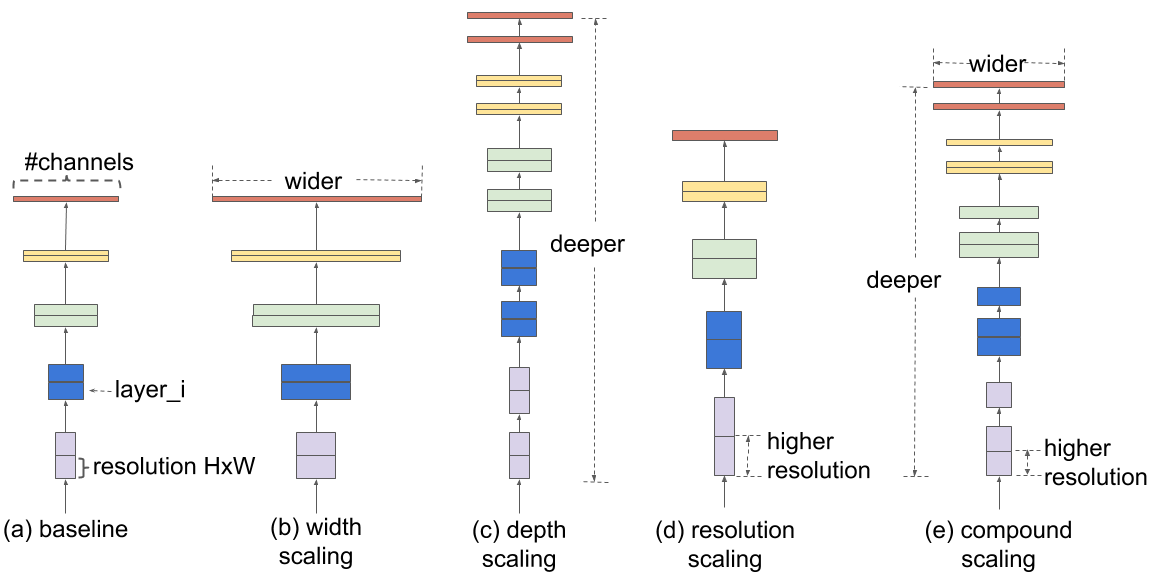
Quelle: https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html

<br />

The Baseline of a model can be seen in part a of the upper figure, this is the model that needs to be changed in order to improve either performance, precision or both. In the figure below the Accuracy relative to the FLOPS is shown, FLOPS are floating point operations per second, this is a metric for the computational performance. The EfficientNet Architecture can be scaled into categories B1-6, each category having a higher compound scaling, thus more accuracy and more FLOPS needed. The EfficientNet has better accuracy in the ImageNet database than every other convolutional neural network architecture it was compared to. When this paper was reviewed, the decision was made to use the EfficientNet architecture for further implementation of the project after the custom model was discarded.

<br />

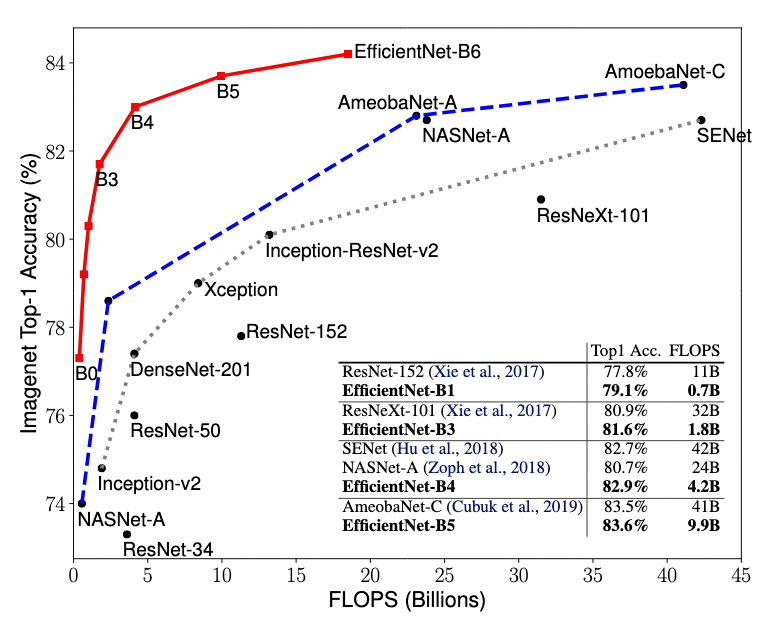

QUELLE: https://arxiv.org/pdf/1905.11946.pdf